In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Documents/Projects/bodyfat.csv")

In [3]:
df.isnull().any()

Density    False
BodyFat    False
Age        False
Weight     False
Height     False
Neck       False
Chest      False
Abdomen    False
Hip        False
Thigh      False
Knee       False
Ankle      False
Biceps     False
Forearm    False
Wrist      False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [6]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


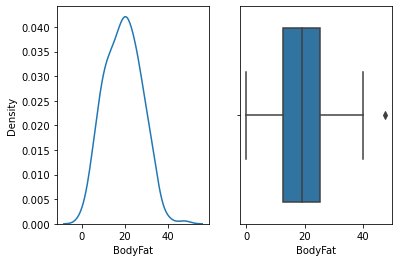

In [97]:
#distribution of outcome variable
f, axes = plt.subplots(1,2)
sbn.kdeplot(df['BodyFat'], ax = axes[0])
sbn.boxplot(df['BodyFat'], ax = axes[1])
plt.show()

In [10]:
features = df.loc[:,df.columns!="BodyFat"]
outcome = df.loc[:,"BodyFat"]

0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: BodyFat, dtype: float64

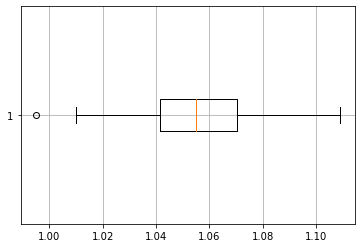

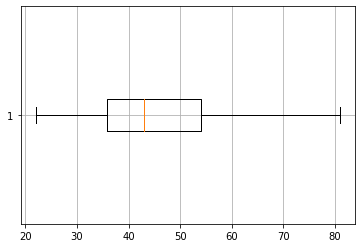

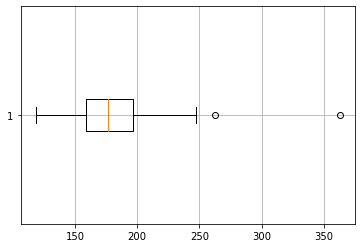

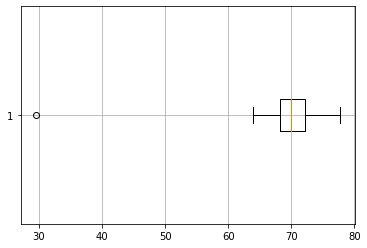

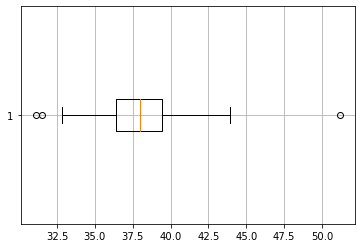

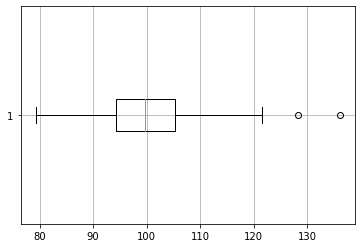

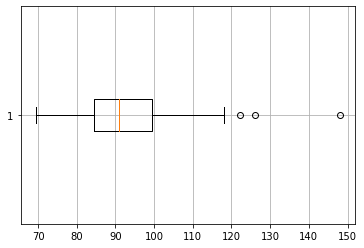

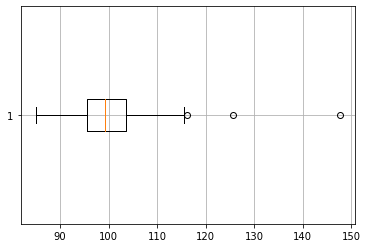

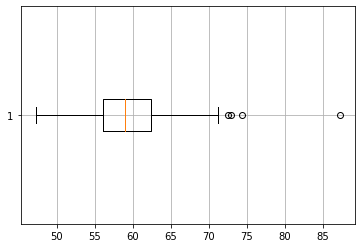

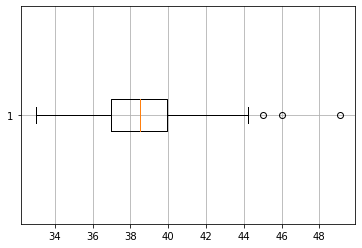

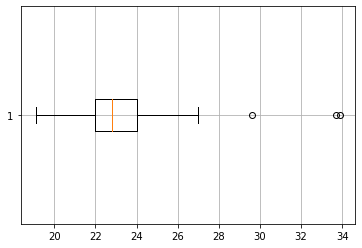

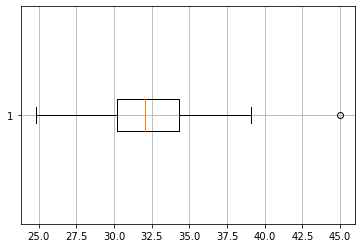

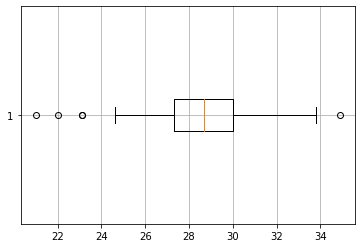

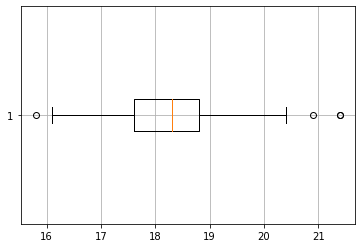

In [28]:
for i in features.columns:
    plt.figure()
    plt.boxplot(x = features[i], vert = False)
    plt.grid()
    plt.show()

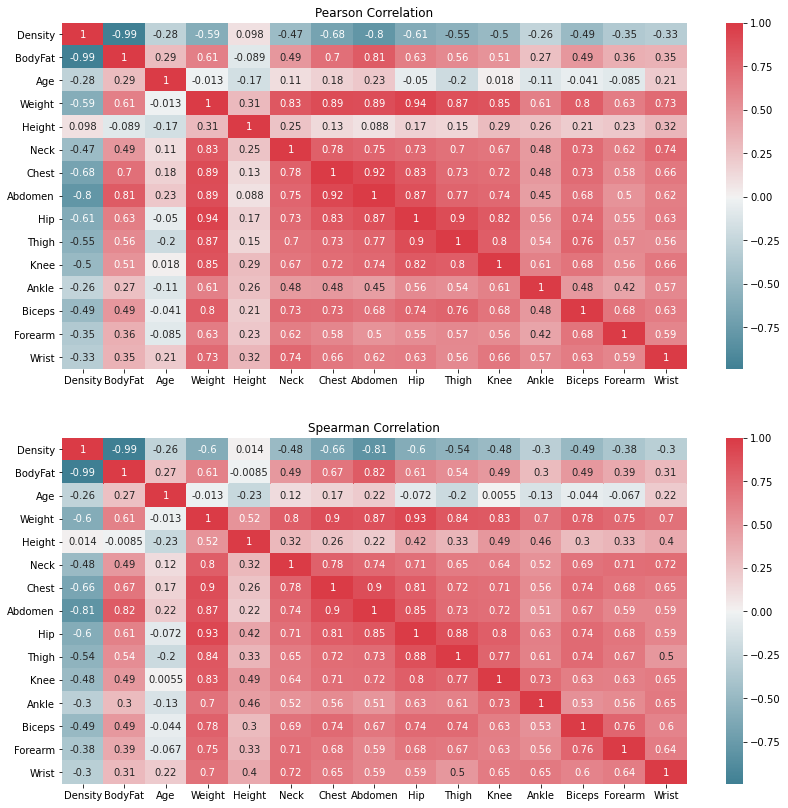

In [45]:
corr_pearson = df.corr(method = 'pearson')
corr_spearman = df.corr(method = 'spearman')

cmap = sbn.diverging_palette(220,10, as_cmap = True)

plt.figure(figsize = (14,14))
ax1 = plt.subplot(2,1,1)
sbn.heatmap(corr_pearson, annot = True, center = 0, cmap=cmap)
plt.title('Pearson Correlation')

ax2 = plt.subplot(2,1,2, sharex = ax1)
sbn.heatmap(corr_spearman, annot = True, center = 0, cmap=cmap)
plt.title('Spearman Correlation')

plt.show()

In [74]:
"""
want to train 3 models: linear regression, Random Forrest, and XGBoost
dummy data not applicable since no categorical data
train test split
train models
tune models
test ensembles
"""

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [59]:
X_train,X_test,y_train,y_test = train_test_split(features,outcome,test_size = 0.3)

In [48]:
pipeline_lr = Pipeline([
    ('scalar1', StandardScaler()),
    ('lr_regressor', LinearRegression())
])

In [66]:
pipeline_rf = Pipeline([
    ('scalar2', StandardScaler()),
    ('rf_regressor', RandomForestRegressor())
])

In [52]:
pipeline_xr = Pipeline([
    ('scalar3', StandardScaler()),
    ('xr_regressor', XGBRegressor())
])

In [83]:
pipelines = [pipeline_lr, pipeline_rf, pipeline_xr]
pipe_dict = {0:'Linear Regression', 1:"Random Forest", 2:"XGBoost"}

In [75]:
def scorePrint(model, x, y):
    predicted = model.predict(x)
    r2 = r2_score(y,predicted)
    mae = mean_absolute_error(y,predicted)
    mse = mean_squared_error(y,predicted,)
    print("R2 Score: ",round(r2,4))
    print("Mean Absolute Error Score: ", round(mae,4))
    print("Root Mean Squared Error: ", round(np.sqrt(mse),4))

In [73]:
pipeline_lr.fit(X_train,y=y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_xr.fit(X_train, y_train)

Pipeline(steps=[('scalar3', StandardScaler()),
                ('xr_regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=4, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [96]:
for model in range(len(pipelines)):
    print(pipe_dict[model])
    scorePrint(pipelines[model], X_test,y_test)
    print()

Linear Regression
R2 Score:  0.9914
Mean Absolute Error Score:  0.5697
Root Mean Squared Error:  0.7031

Random Forest
R2 Score:  0.9963
Mean Absolute Error Score:  0.2378
Root Mean Squared Error:  0.4635

XGBoost
R2 Score:  0.991
Mean Absolute Error Score:  0.4631
Root Mean Squared Error:  0.7188



In [ ]:
"""
Random forest classifier best model, should try and change parameters to
see if better fit is avaliable 
"""